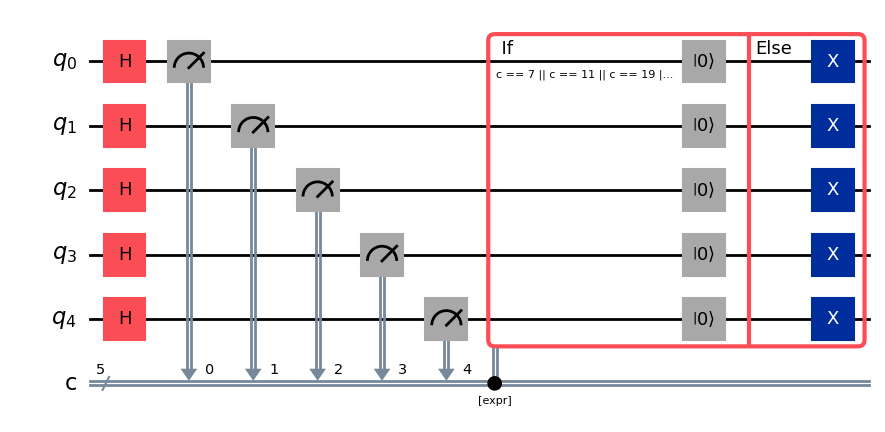

In [1]:
from itertools import combinations

from qiskit.circuit import ClassicalRegister, QuantumCircuit
from qiskit.circuit.classical import expr


def min_set_bits_nums(n_bits: int, min_set_bits: int) -> expr.Expr:
    result = []
    # Iterate over the range of required set bits
    for k in range(min_set_bits, n_bits + 1):
        for combo in combinations(range(n_bits), k):
            # Create a number with bits set at positions in combo
            number = 0
            for bit in combo:
                number |= 1 << bit
            result.append(number)

    return result


def numbers_to_expr(creg: ClassicalRegister, min_set_bits: int) -> expr.Expr:
    numbers = min_set_bits_nums(creg.size, min_set_bits)
    or_expr = expr.equal(creg, numbers[0])
    for number in numbers[1:]:
        or_expr = expr.logic_or(or_expr, expr.equal(creg, number))
    return or_expr


# print(nums)


true_circuit = QuantumCircuit(5, 5)
true_circuit.reset(range(5))

false_circuit = QuantumCircuit(5, 5)
false_circuit.x(range(5))


circuit = QuantumCircuit(5, 5)

circuit.h(range(5))

circuit.measure(range(5), range(5))


circuit.if_else(
    numbers_to_expr(circuit.cregs[0], 3),
    true_body=true_circuit,
    false_body=false_circuit,
    qubits=range(5),
    clbits=range(5),
)


circuit.draw('mpl', fold=-1)


In [2]:
from qiskit_aer import AerSimulator
from qiskit.circuit import QuantumCircuit
from time import perf_counter

sim1 = AerSimulator(method="density_matrix")
sim2 = AerSimulator(method="statevector")


def create_ghz_circuit(n_qubits, reps=1):
    circuit = QuantumCircuit(n_qubits, n_qubits)
    circuit.h(0)
    for r in range(reps):
        for qubit in range(n_qubits - 1):
            circuit.cx(qubit, qubit + 1)
        circuit.measure(n_qubits - r - 1, n_qubits - r - 1)
    return circuit


circuit = create_ghz_circuit(10, 4)

start = perf_counter()
x1 = sim1.run(circuit, shots=100000).result().get_counts()
print(perf_counter() - start)
start = perf_counter()
x2 = sim2.run(circuit, shots=100000).result().get_counts()
print(perf_counter() - start)